In [2]:
import pandas as pd

# Load the combined data
data = pd.read_excel(r"C:\Code_data\DS project\combined_data_final.xlsx")

# Check for missing values
print(data.isnull().sum())


-170.935985         0
 160.302731         0
-38.691922          0
 24.438623          0
-6.084949           0
                   ..
-0.023766           0
 0.306592           0
-0.344758           0
 0.103536           0
 national anthem    0
Length: 221, dtype: int64


In [3]:
# Separate features (all columns except the last) and target (last column)
X = data.iloc[:, :-1]  # All rows, all columns except the last
y = data.iloc[:, -1]   # All rows, last column (artist)


In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode artist names to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



In [5]:
from sklearn.model_selection import train_test_split

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [6]:
from sklearn.preprocessing import StandardScaler

# Ensure column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the SVM model with the RBF kernel (default)
model = SVC(kernel='rbf', random_state=42)  # You can change 'rbf' to 'linear', 'poly', or 'sigmoid' if needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Display the evaluation results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)



Accuracy: 0.8372093023255814

Classification Report:
                  precision    recall  f1-score   support

    asha bhosle       1.00      1.00      1.00         2
       bhavgeet       0.85      0.85      0.85        13
  kishore kumar       1.00      1.00      1.00         4
          lavni       0.70      1.00      0.82         7
michael jackson       0.91      0.77      0.83        13
national anthem       0.67      0.50      0.57         4

       accuracy                           0.84        43
      macro avg       0.85      0.85      0.85        43
   weighted avg       0.85      0.84      0.83        43



In [8]:
import pandas as pd

# Load the Excel file
file_path = r"C:\Code_data\DS project\combined_data_final.xlsx"
combined_data = pd.read_excel(file_path, header=None)  # Use header=None for no column names

# Display the first few rows to understand its structure
print(combined_data.head())
print("\nShape of the dataset:", combined_data.shape)



          0           1          2          3          4          5    \
0 -170.935985  160.302731 -38.691922  24.438623  -6.084949   8.439611   
1  -54.470555   34.046868 -16.898106  20.363475  -8.840014  10.382523   
2 -177.988505  143.429538 -16.700542  33.433341   1.889361  26.575636   
3 -161.734699  113.197424 -28.199954  25.544179 -13.402828  14.160119   
4 -238.319730  149.747729 -40.032116  26.532856  -7.683764   7.360687   

         6          7         8          9    ...       211       212  \
0 -10.859845   2.927454 -4.081398  -9.977878  ... -0.409626 -0.068296   
1  -4.201171   3.228289 -3.606952   0.545076  ...  6.439107  4.141638   
2  -1.367856  20.872458 -9.368953  -0.688695  ... -0.279268 -0.104920   
3 -15.412608   9.407264 -7.303850  -3.873367  ... -0.444372  0.076066   
4  -9.891025   2.041690 -2.735458 -10.108223  ... -0.363484  1.354273   

        213       214       215       216       217       218       219  \
0  0.081795 -0.215158 -0.328591 -0.023766  0.30

In [9]:
# Assuming the dataset has N columns, with the last column being the label
num_features = combined_data.shape[1] - 1

# Assign column names
columns = [f'feature_{i+1}' for i in range(num_features)] + ['label']
combined_data.columns = columns

# Display the updated DataFrame with column names
print(combined_data.head())


    feature_1   feature_2  feature_3  feature_4  feature_5  feature_6  \
0 -170.935985  160.302731 -38.691922  24.438623  -6.084949   8.439611   
1  -54.470555   34.046868 -16.898106  20.363475  -8.840014  10.382523   
2 -177.988505  143.429538 -16.700542  33.433341   1.889361  26.575636   
3 -161.734699  113.197424 -28.199954  25.544179 -13.402828  14.160119   
4 -238.319730  149.747729 -40.032116  26.532856  -7.683764   7.360687   

   feature_7  feature_8  feature_9  feature_10  ...  feature_212  feature_213  \
0 -10.859845   2.927454  -4.081398   -9.977878  ...    -0.409626    -0.068296   
1  -4.201171   3.228289  -3.606952    0.545076  ...     6.439107     4.141638   
2  -1.367856  20.872458  -9.368953   -0.688695  ...    -0.279268    -0.104920   
3 -15.412608   9.407264  -7.303850   -3.873367  ...    -0.444372     0.076066   
4  -9.891025   2.041690  -2.735458  -10.108223  ...    -0.363484     1.354273   

   feature_214  feature_215  feature_216  feature_217  feature_218  \
0   

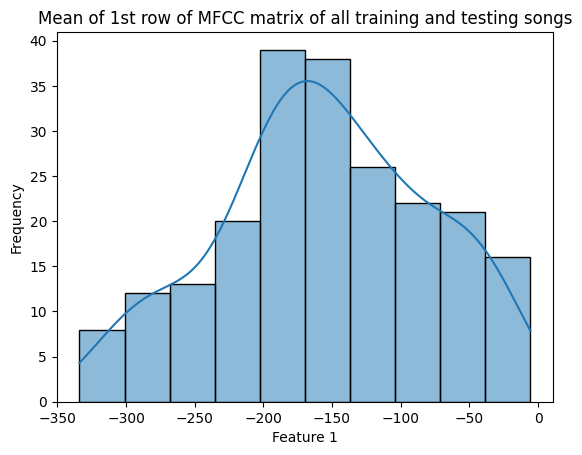

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram for 'feature_1'
sns.histplot(data=combined_data, x='feature_1', kde=True)
plt.title('Mean of 1st row of MFCC matrix of all training and testing songs')
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.show()


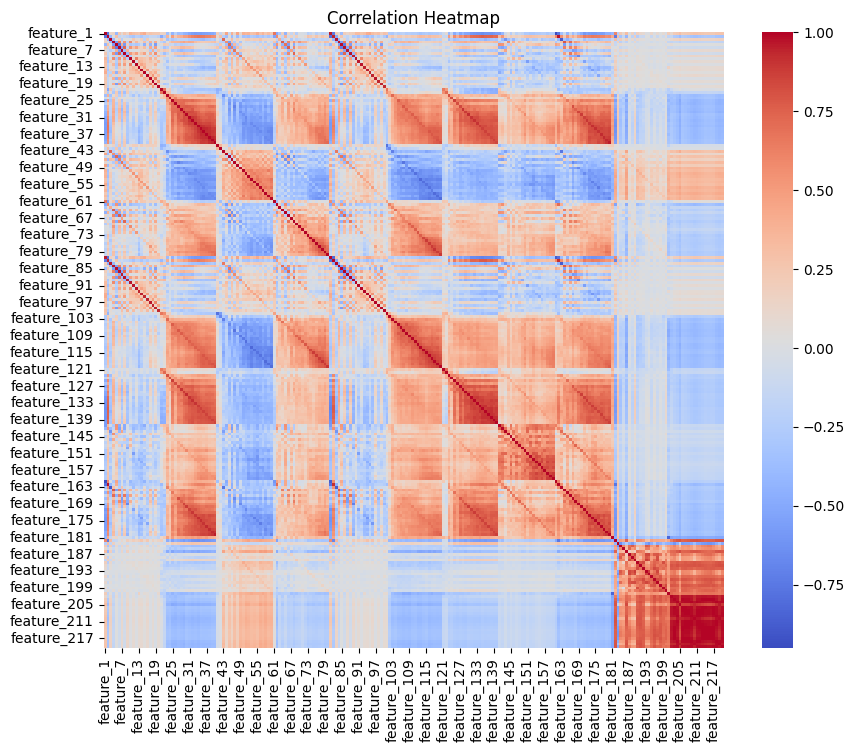

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a heatmap for feature correlations
plt.figure(figsize=(10, 8))
corr = combined_data.iloc[:, :-1].corr()  # Exclude the label column
sns.heatmap(corr, annot=False, cmap='coolwarm')  # Set annot=False to hide values
plt.title('Correlation Heatmap')
plt.show()


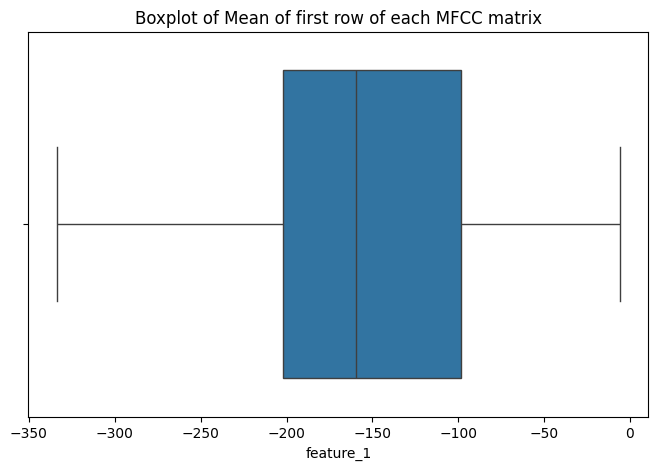

In [12]:
# Boxplot for a selected feature
plt.figure(figsize=(8, 5))
sns.boxplot(data=combined_data, x='feature_1')
plt.title('Boxplot of Mean of first row of each MFCC matrix')
plt.show()


C:\Users\parvs\AppData\Local\Temp\ipykernel_9324\1961322446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_data, x='label', palette='pastel')


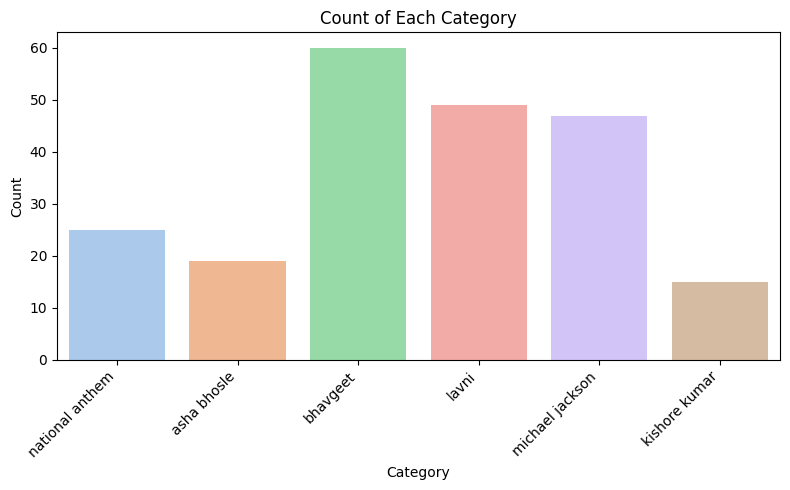

In [13]:
# Distribution of labels with rotated x-axis labels
plt.figure(figsize=(8, 5))  # Adjust figure size as needed
sns.countplot(data=combined_data, x='label', palette='pastel')
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees, aligned to the right
plt.tight_layout()  # Adjusts subplot params for better fit
plt.show()


In [14]:
from scipy.stats import zscore
z_scores = combined_data.iloc[:, :-1].apply(zscore)
print(z_scores)


     feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0    -0.198820   0.749711  -0.720247   0.019040  -0.270722   0.028899   
1     1.316586  -1.593332   0.328092  -0.167150  -0.462154   0.161209   
2    -0.290585   0.436580   0.337595   0.430000   0.283363   1.263935   
3    -0.079096  -0.124465  -0.215556   0.069552  -0.779195   0.418457   
4    -1.075593   0.553832  -0.784714   0.114723  -0.381813  -0.044574   
..         ...        ...        ...        ...        ...        ...   
210  -1.800305   1.058383  -0.315495  -0.796896   1.128653  -1.304273   
211  -1.262778   0.477645   1.022749  -0.424110   2.496682  -1.419932   
212  -0.090932   0.284126  -1.043399   0.865061  -0.265888  -0.464250   
213  -0.138870   0.376867  -1.809494   0.443607   0.493563  -1.233957   
214  -0.604181   1.215667  -1.349105  -1.299753   1.265974  -1.029630   

     feature_7  feature_8  feature_9  feature_10  ...  feature_211  \
0    -0.613475  -0.179319   0.095025   -1.626456  ...

In [15]:
feature_variances = combined_data.iloc[:, :-1].var()
print("Feature Variances:\n", feature_variances)


Feature Variances:
 feature_1      5934.182152
feature_2      2917.207405
feature_3       434.197798
feature_4       481.284037
feature_5       208.093917
                  ...     
feature_216    2262.991480
feature_217    3271.544372
feature_218    1845.584769
feature_219    2226.531857
feature_220    1585.567816
Length: 220, dtype: float64


In [16]:
feature_skewness = combined_data.iloc[:, :-1].apply(lambda x: skew(x))
feature_kurtosis = combined_data.iloc[:, :-1].apply(lambda x: kurtosis(x))


NameError: name 'skew' is not defined

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Assuming combined_data is already loaded

# Calculate skewness and kurtosis for each feature
feature_skewness = combined_data.iloc[:, :-1].apply(lambda x: skew(x))
feature_kurtosis = combined_data.iloc[:, :-1].apply(lambda x: kurtosis(x))

# Display results
print("Feature Skewness:\n", feature_skewness)
print("\nFeature Kurtosis:\n", feature_kurtosis)



Feature Skewness:
 feature_1      -0.140116
feature_2      -0.406431
feature_3      -0.413587
feature_4      -0.462788
feature_5       0.293395
                 ...    
feature_216    13.258418
feature_217    12.732350
feature_218    10.974721
feature_219     9.790655
feature_220    11.394637
Length: 220, dtype: float64

Feature Kurtosis:
 feature_1       -0.599402
feature_2       -0.371475
feature_3        0.499571
feature_4        0.065051
feature_5        0.434962
                  ...    
feature_216    183.296359
feature_217    170.895497
feature_218    130.374903
feature_219    102.084584
feature_220    142.591005
Length: 220, dtype: float64


In [ ]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(combined_data.iloc[:, :-1], combined_data['label'])
print("Mutual Information Scores:\n", mi_scores)


Mutual Information Scores:
 [0.14461343 0.29362002 0.06306215 0.13848509 0.30938573 0.34835307
 0.09792545 0.37776594 0.02131833 0.26157033 0.09591894 0.26155034
 0.05470546 0.14081647 0.20454154 0.06657416 0.27599524 0.04089071
 0.30735281 0.10560458 0.10645832 0.2507358  0.09001454 0.
 0.08367526 0.03055442 0.00943302 0.11746694 0.11722293 0.10312343
 0.13579413 0.07350843 0.08453168 0.05171232 0.01629516 0.13539751
 0.07242242 0.0749698  0.0836881  0.22375552 0.31625988 0.16173279
 0.10335887 0.11328034 0.13985976 0.27551744 0.11469723 0.0636158
 0.06402934 0.12564431 0.00777332 0.18705841 0.16818933 0.06097918
 0.15080192 0.03771185 0.10264349 0.02925662 0.11810535 0.2299622
 0.4226717  0.19784396 0.00410798 0.24158286 0.20935804 0.28310599
 0.08225664 0.28298096 0.03532795 0.14603123 0.09292049 0.11385686
 0.0538257  0.09771343 0.06474817 0.02961063 0.14012132 0.12958385
 0.16380605 0.12487203 0.19899146 0.3056285  0.09450278 0.14895506
 0.29809449 0.28756547 0.09642678 0.29280463

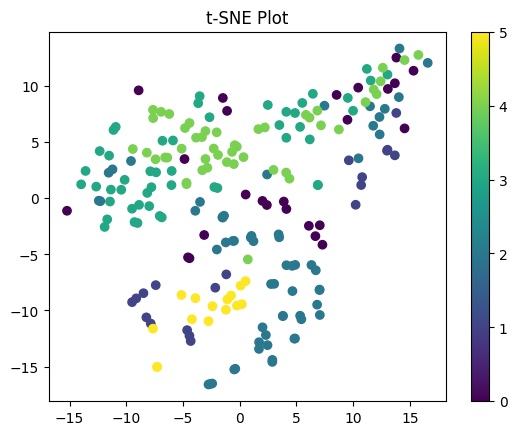

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data.iloc[:, :-1])

# Run t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(scaled_data)

# Adjust label mapping based on actual values in 'label'
label_mapping = {value: idx for idx, value in enumerate(combined_data['label'].unique())}
colors = combined_data['label'].map(label_mapping)

# Plot the t-SNE results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors, cmap='viridis')
plt.title('t-SNE Plot')
plt.colorbar()
plt.show()



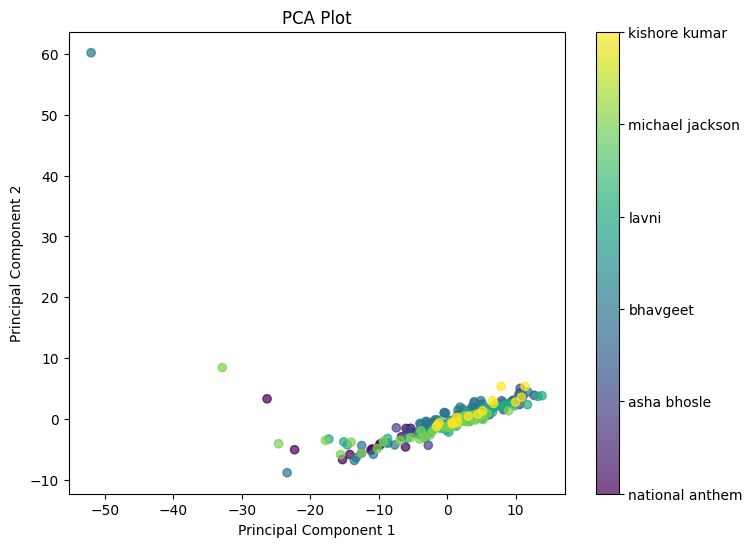

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data.iloc[:, :-1])

# Step 2: Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Step 3: Map the labels to colors (adjust based on actual labels in the data)
label_mapping = {value: idx for idx, value in enumerate(combined_data['label'].unique())}
colors = combined_data['label'].map(label_mapping)

# Step 4: Plot the PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_results[:, 0], pca_results[:, 1], c=colors, cmap='viridis', alpha=0.7)
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a color bar to map colors to labels
cbar = plt.colorbar(scatter)
cbar.set_ticks(list(label_mapping.values()))
cbar.set_ticklabels(list(label_mapping.keys()))

plt.show()


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to two principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Feature Distribution by Classes")
plt.colorbar(scatter, label="Encoded Labels")
plt.show()


TypeError: Feature names are only supported if all input features have string names, but your input has ['float', 'int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

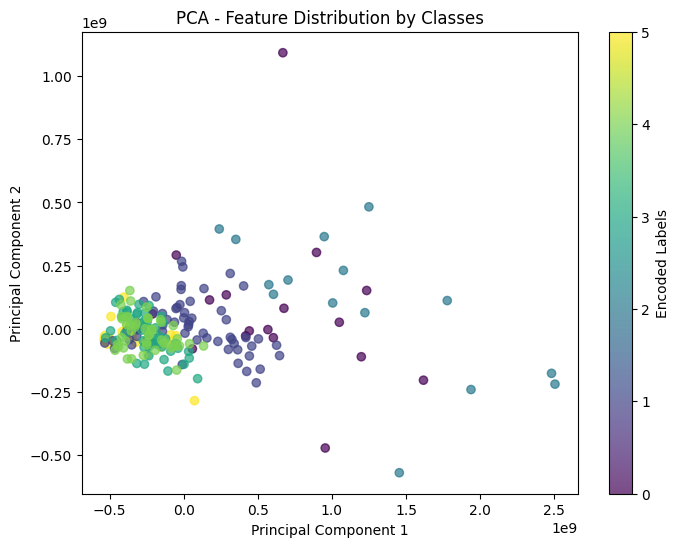

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel(r"C:\Code_data\DS project\combined_data_final.xlsx")

# Separate features and target
X = data.iloc[:, :-1]  # All rows, all columns except the last
y = data.iloc[:, -1]   # All rows, last column (artist)

# Ensure all column names are strings
X.columns = X.columns.astype(str)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply PCA to reduce to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Feature Distribution by Classes")
plt.colorbar(scatter, label="Encoded Labels")
plt.show()


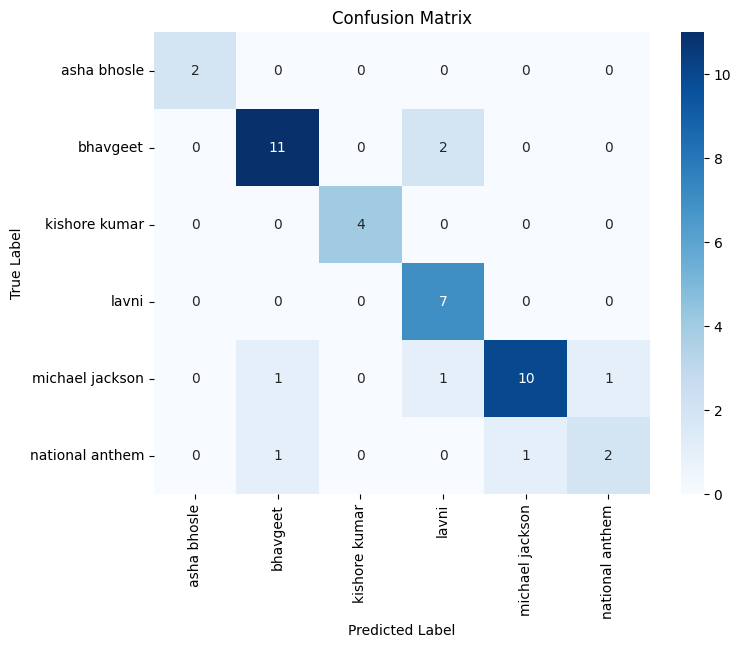

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


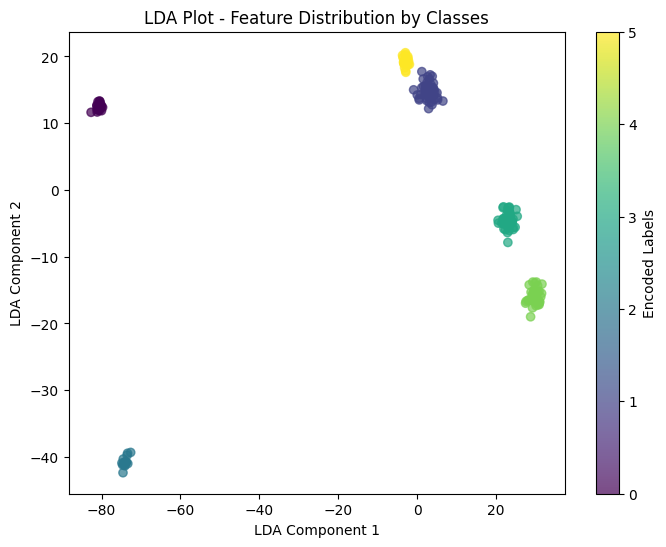

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Apply LDA for dimensionality reduction to 2D
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y_encoded)

# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Plot - Feature Distribution by Classes")
plt.colorbar(scatter, label="Encoded Labels")
plt.show()


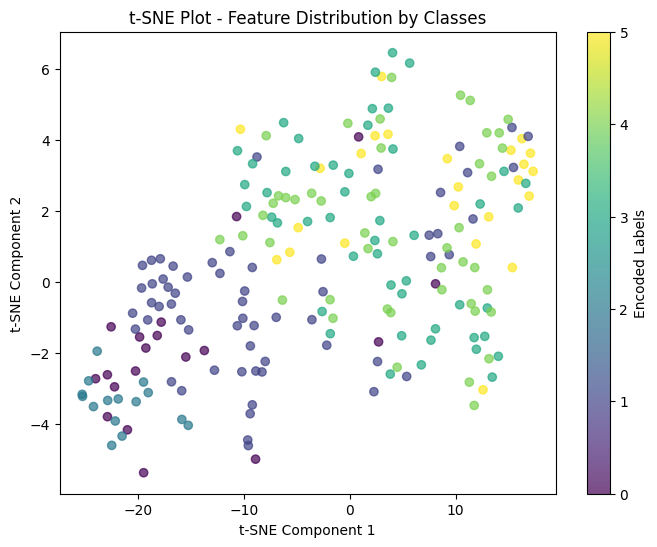

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Ensure all column names are strings
X.columns = X.columns.astype(str)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(X)

# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Plot - Feature Distribution by Classes")
plt.colorbar(scatter, label="Encoded Labels")
plt.show()



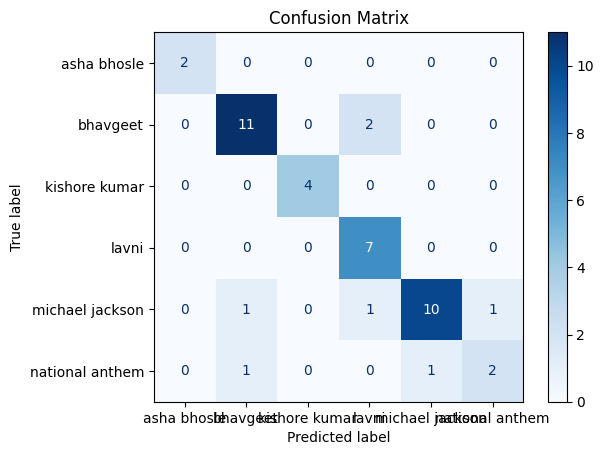

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_encoder.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


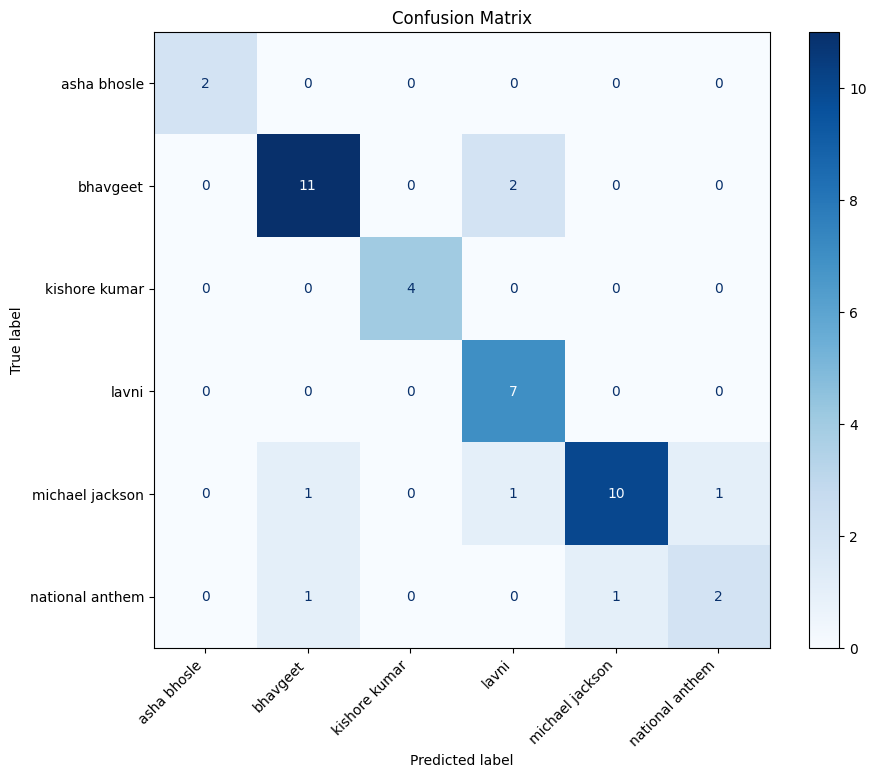

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot the confusion matrix with rotated x-axis labels
fig, ax = plt.subplots(figsize=(10, 8))  # Increase figure size if needed
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_encoder.classes_, cmap="Blues", ax=ax)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.title("Confusion Matrix")
plt.show()


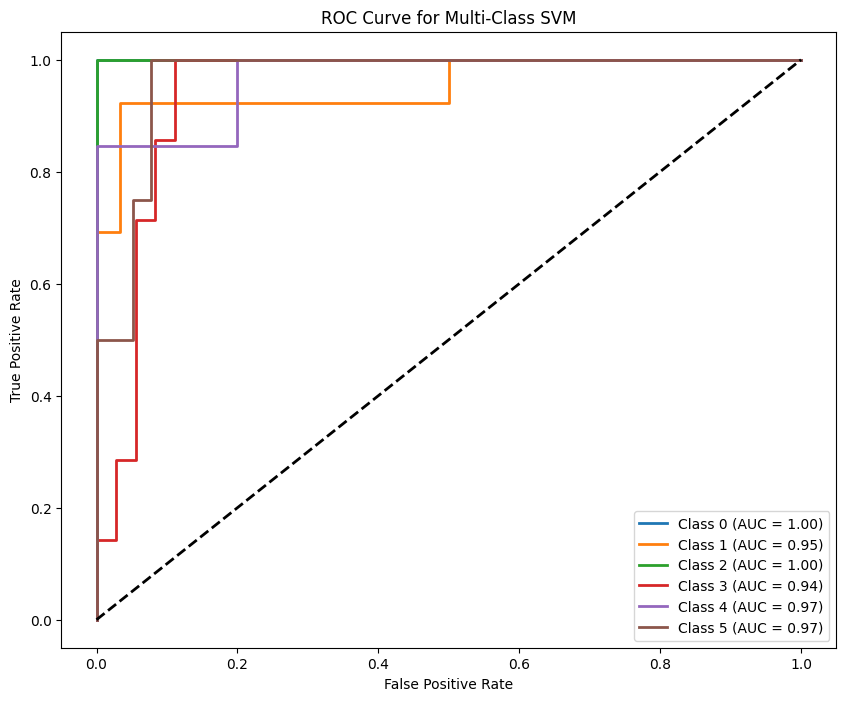

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Binarize the labels for multi-class ROC curve plotting
y_bin = label_binarize(y_test, classes=list(range(len(label_encoder.classes_))))
n_classes = y_bin.shape[1]

# Train SVM in a one-vs-rest setting
model_ovr = OneVsRestClassifier(SVC(probability=True, random_state=42))
model_ovr.fit(X_train, y_train)
y_score = model_ovr.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class SVM")
plt.legend(loc="lower right")
plt.show()


C:\Users\parvs\AppData\Local\Temp\ipykernel_19708\1131336442.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


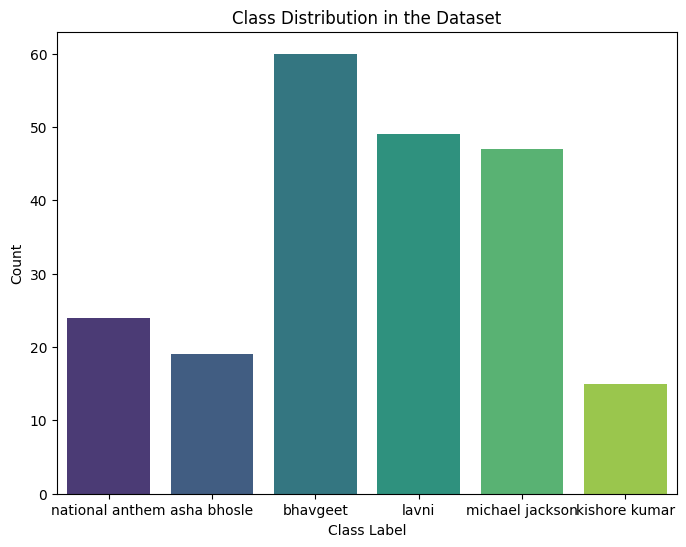

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='viridis')
plt.title("Class Distribution in the Dataset")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


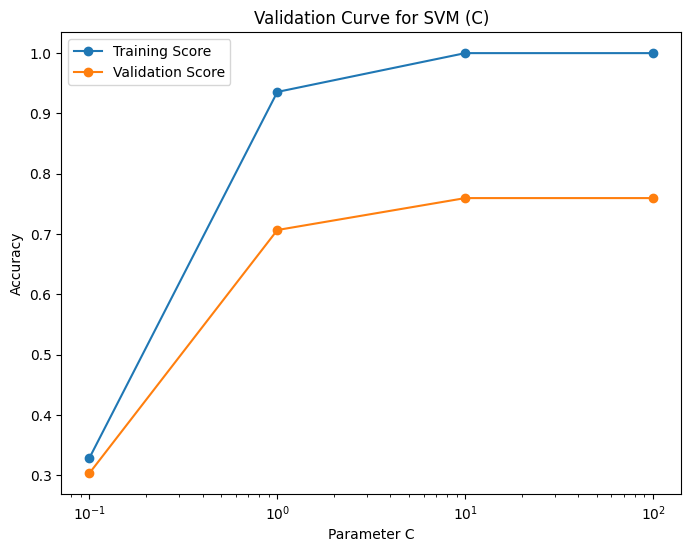

In [ ]:
from sklearn.model_selection import validation_curve

# Validation curve for SVM with varying values of C
param_range = [0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(SVC(), X_train, y_train, param_name="C", param_range=param_range, scoring="accuracy", cv=5)

plt.figure(figsize=(8, 6))
plt.plot(param_range, train_scores.mean(axis=1), label="Training Score", marker='o')
plt.plot(param_range, test_scores.mean(axis=1), label="Validation Score", marker='o')
plt.xscale("log")
plt.xlabel("Parameter C")
plt.ylabel("Accuracy")
plt.title("Validation Curve for SVM (C)")
plt.legend()
plt.show()


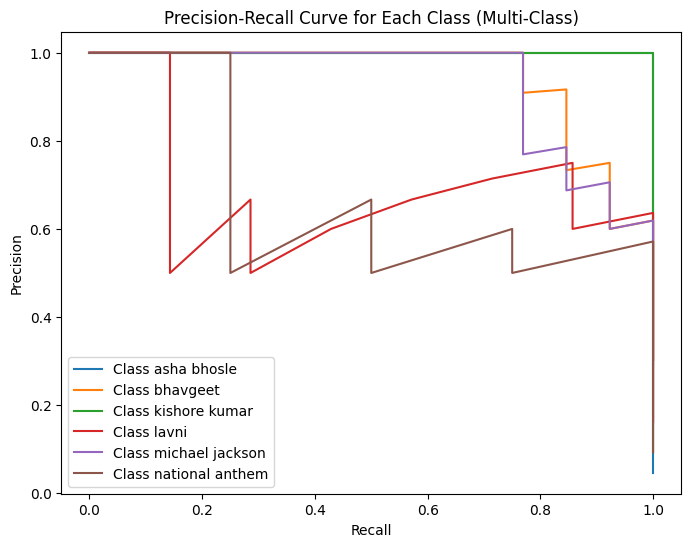

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Initialize the SVM model with probability=True to enable predict_proba()
model = SVC(random_state=42, probability=True)
model.fit(X_train, y_train)

# Get the predicted probabilities (not decision function) for each class
y_probs = model.predict_proba(X_test)  # Now you can use predict_proba

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_probs.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test == i, y_probs[:, i])  # OvR approach
    plt.plot(recall, precision, label=f'Class {label_encoder.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class (Multi-Class)')
plt.legend(loc='best')
plt.show()



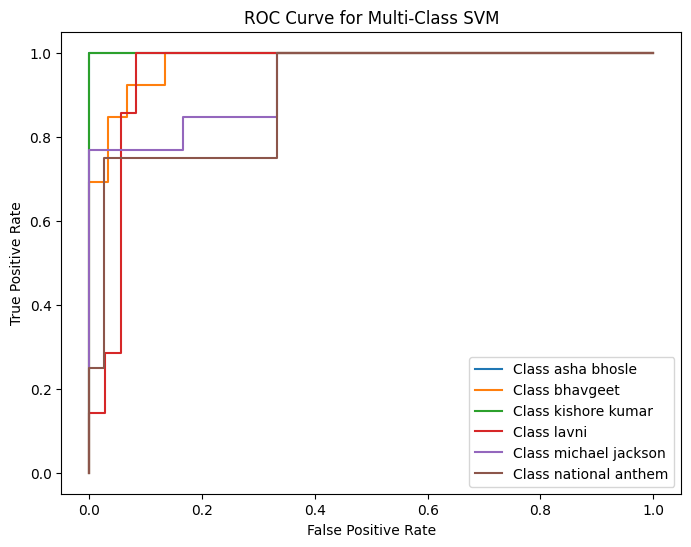

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay
import numpy as np
import matplotlib.pyplot as plt

# For multi-class ROC, select one class at a time if needed
plt.figure(figsize=(8, 6))

# Iterate over each class
for i in np.unique(y_test):
    # Compute the false positive rate and true positive rate for each class
    fpr, tpr, _ = roc_curve(y_test == i, model.decision_function(X_test)[:, i])
    
    # Plot the ROC curve for each class
    plt.plot(fpr, tpr, label=f'Class {label_encoder.classes_[i]}')  # Add label for each class

plt.title("ROC Curve for Multi-Class SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")  # Show legend for all classes
plt.show()



In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the classification report without styling
print(report_df)


                 precision    recall  f1-score    support
asha bhosle       1.000000  1.000000  1.000000   2.000000
bhavgeet          0.846154  0.846154  0.846154  13.000000
kishore kumar     1.000000  1.000000  1.000000   4.000000
lavni             0.700000  1.000000  0.823529   7.000000
michael jackson   0.909091  0.769231  0.833333  13.000000
national anthem   0.666667  0.500000  0.571429   4.000000
accuracy          0.837209  0.837209  0.837209   0.837209
macro avg         0.853652  0.852564  0.845741  43.000000
weighted avg      0.846159  0.837209  0.834506  43.000000


C:\Users\parvs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\parvs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parvs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag

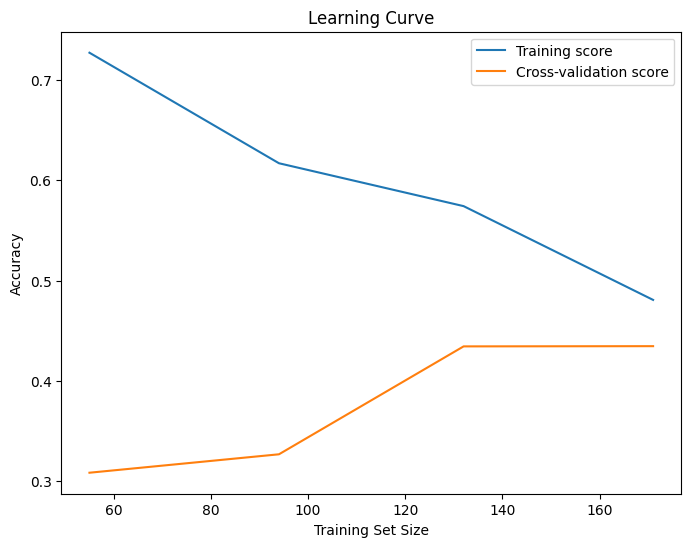

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y_encoded, cv=5, scoring='accuracy', n_jobs=-1)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.show()


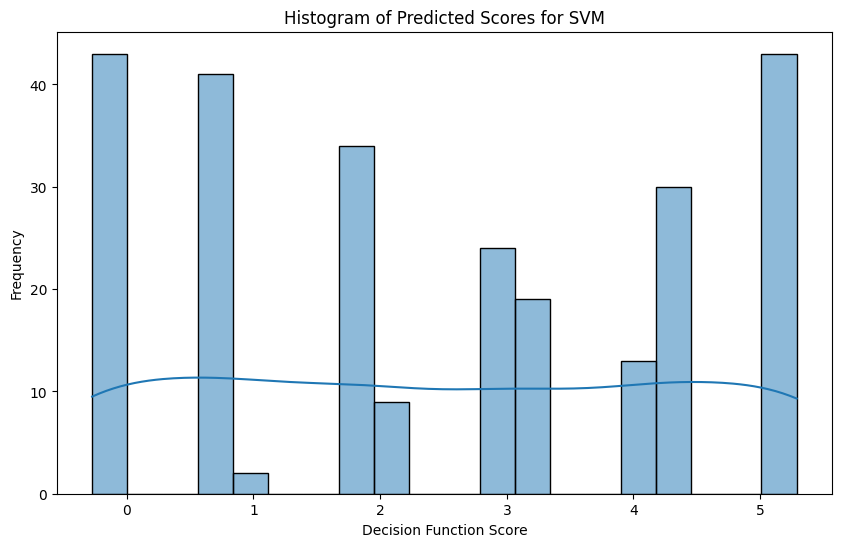

In [ ]:
import seaborn as sns

y_probs = model.decision_function(X_test)  # For SVM, decision function gives a confidence score
plt.figure(figsize=(10, 6))
sns.histplot(y_probs.flatten(), bins=20, kde=True)
plt.xlabel("Decision Function Score")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Scores for SVM")
plt.show()


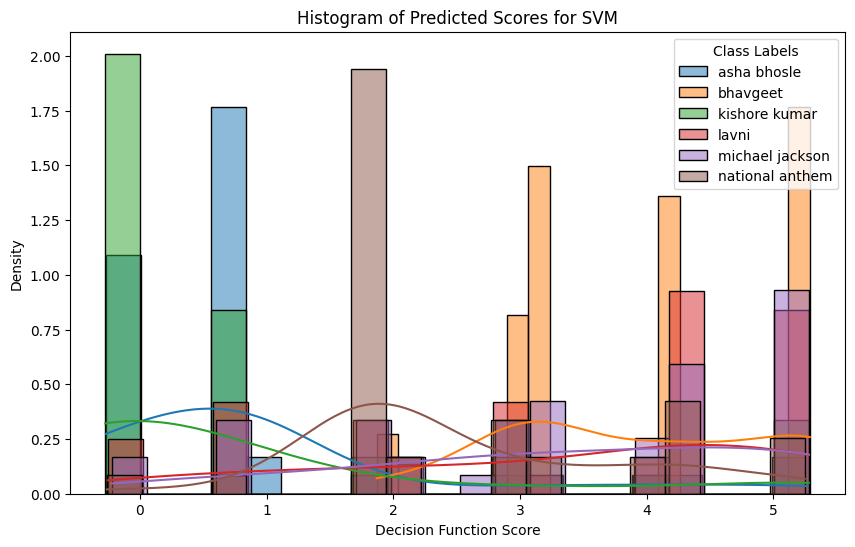

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the decision function scores
y_probs = model.decision_function(X_test)

# If you want to plot the scores for a specific class, e.g., class 0, you can select the scores like so:
# For multi-class, we'll take the scores of the positive class for each observation
class_names = label_encoder.classes_

# For each class, we can flatten the decision function score and map the labels
plt.figure(figsize=(10, 6))

for i, class_name in enumerate(class_names):
    sns.histplot(y_probs[:, i], bins=20, kde=True, label=class_name, stat='density')

plt.xlabel("Decision Function Score")
plt.ylabel("Density")
plt.title("Histogram of Predicted Scores for SVM")
plt.legend(title="Class Labels")
plt.show()


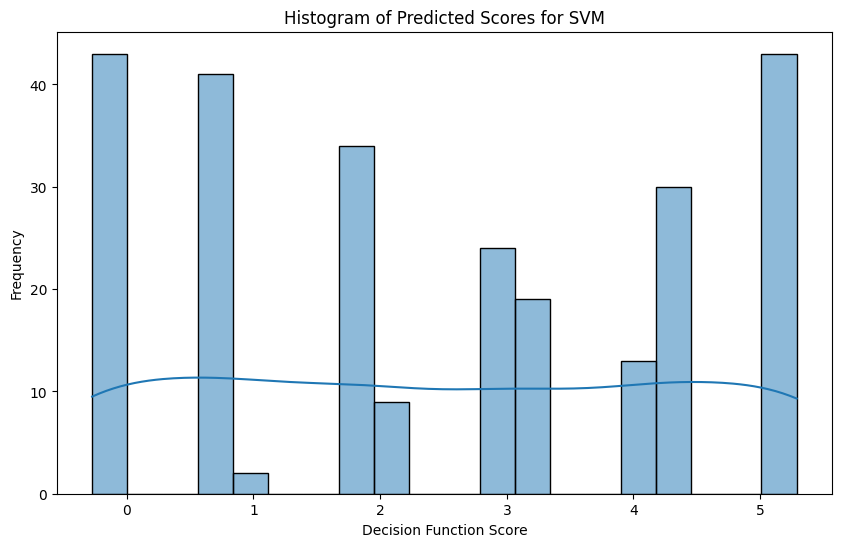

In [ ]:
import seaborn as sns

y_probs = model.decision_function(X_test)  # For SVM, decision function gives a confidence score
plt.figure(figsize=(10, 6))
sns.histplot(y_probs.flatten(), bins=20, kde=True)
plt.xlabel("Decision Function Score")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Scores for SVM")
plt.show()


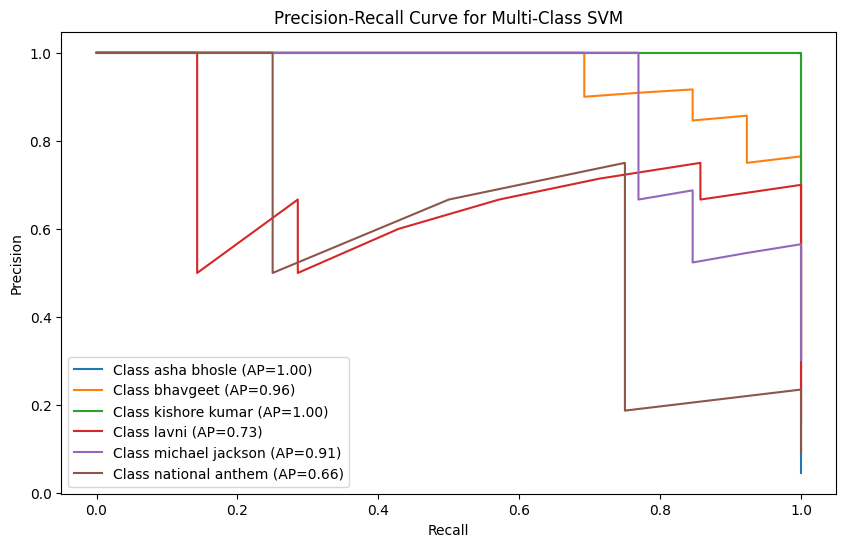

In [21]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import numpy as np

# Get precision and recall values for each class
plt.figure(figsize=(10, 6))
for i in np.unique(y_test):
    precision, recall, _ = precision_recall_curve(y_test == i, model.decision_function(X_test)[:, i])
    average_precision = average_precision_score(y_test == i, model.decision_function(X_test)[:, i])
    plt.plot(recall, precision, label=f'Class {label_encoder.classes_[i]} (AP={average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class SVM')
plt.legend(loc='best')
plt.show()


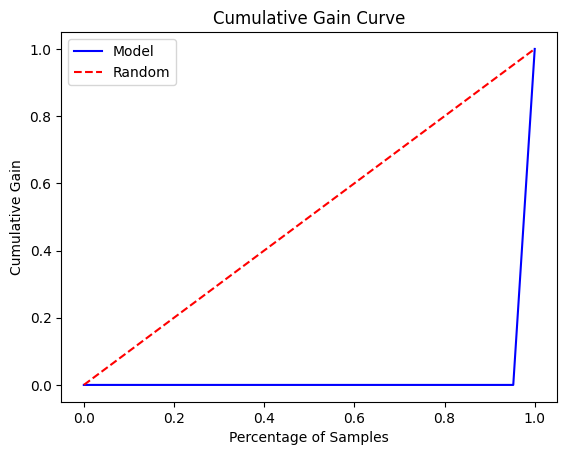

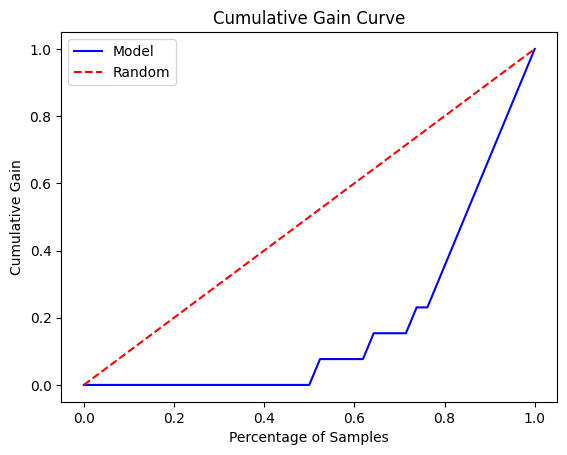

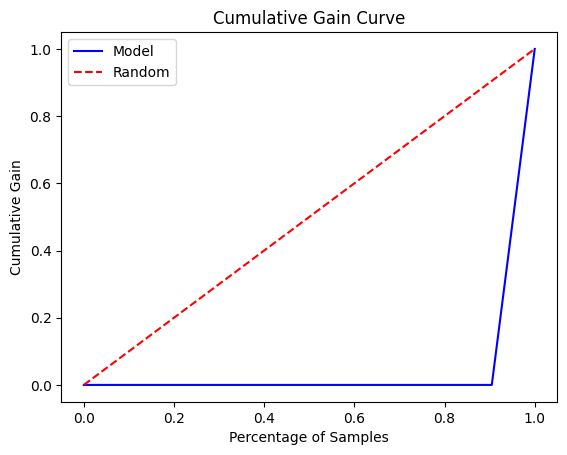

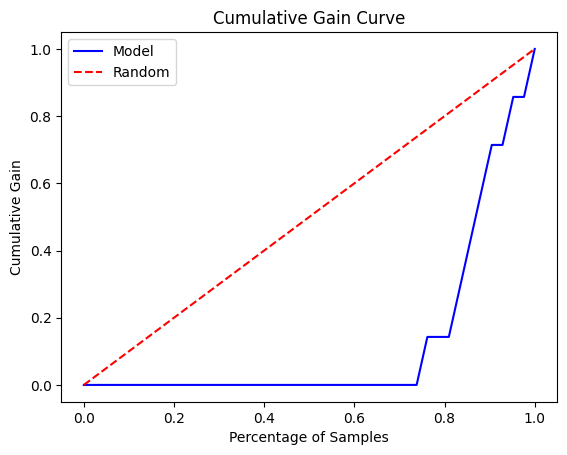

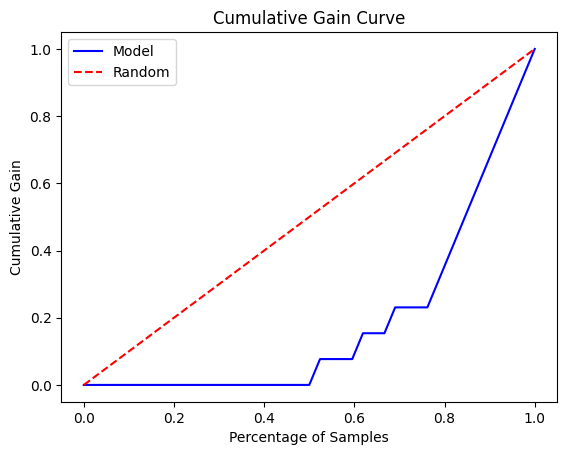

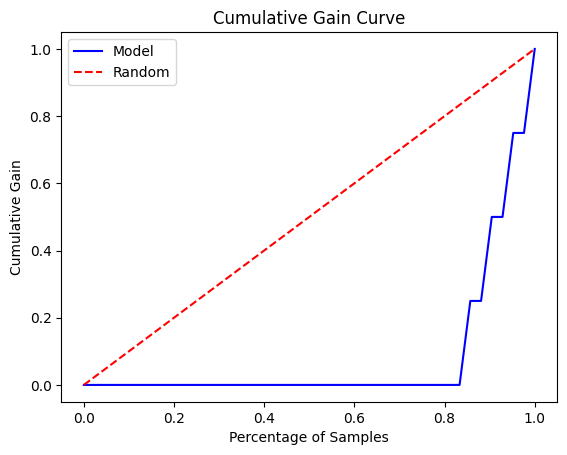

In [23]:
# Initialize and train the SVM model with probability estimation enabled
model = SVC(random_state=42, probability=True)  # Enable probability estimation
model.fit(X_train, y_train)
def cumulative_gain_curve(y_true, y_pred_prob):
    """Plot the Cumulative Gain Curve using probability scores"""
    sorted_indexes = np.argsort(y_pred_prob)  # Sort probabilities
    y_true_sorted = y_true[sorted_indexes]
    cumulative_true = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)
    cumulative_random = np.linspace(0, 1, len(y_true))

    # Plot the cumulative gain curve
    plt.plot(cumulative_random, cumulative_true, label='Model', color='blue')
    plt.plot([0, 1], [0, 1], label='Random', linestyle='--', color='red')
    plt.xlabel('Percentage of Samples')
    plt.ylabel('Cumulative Gain')
    plt.title('Cumulative Gain Curve')
    plt.legend()
    plt.show()

# Get predicted probabilities from SVM
y_probs = model.predict_proba(X_test)

# Call the function for each class and its probability scores
for i in np.unique(y_test):
    cumulative_gain_curve(y_test == i, y_probs[:, i])


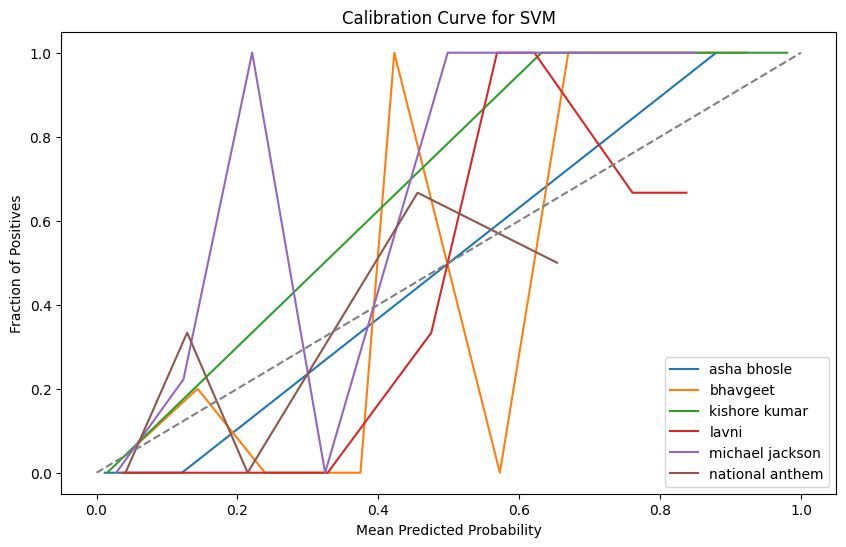

In [24]:
from sklearn.calibration import calibration_curve

# Get the predicted probabilities for each class
y_probs = model.predict_proba(X_test)

# Plot calibration curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(label_encoder.classes_)):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test == i, y_probs[:, i], n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, label=label_encoder.classes_[i])

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve for SVM')
plt.legend(loc='best')
plt.show()


C:\Users\parvs\AppData\Local\Temp\ipykernel_9324\621063080.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='Set2')


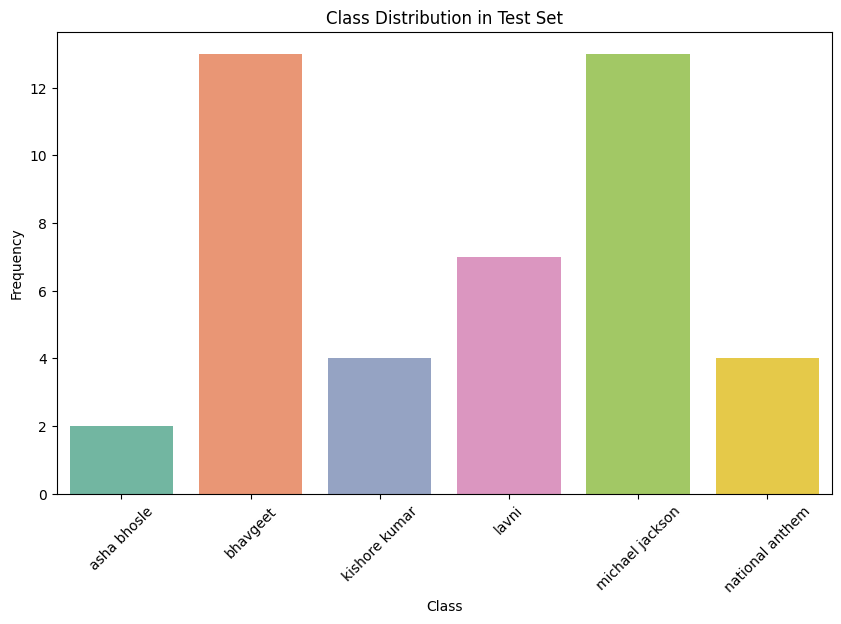

In [25]:
# Visualize the class distribution in y_test
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, palette='Set2')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in Test Set')
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.show()
